*Задание 1.*
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

*Задание 2.*
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

*Задача 3.*
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

*Задача 4.*
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

*Задача 5.*
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

*Задача 6.*
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [2]:

reviews = pd.read_csv("tripadvisor_hotel_reviews.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


<Axes: >

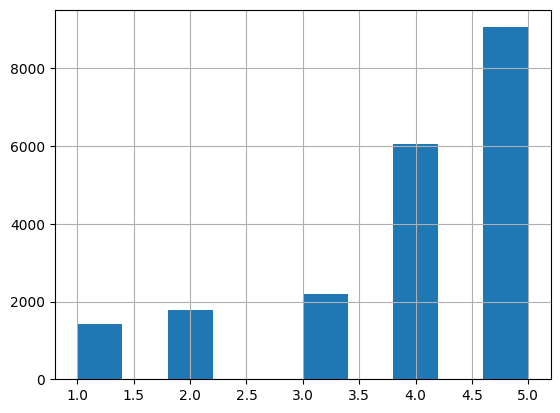

In [5]:
reviews['Rating'].hist()

In [6]:
# размеченное и неразмеченное подмножества данных
reviews = shuffle(reviews)
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.5, random_state=42)
labeled_reviews

,Review,Rating
3475,intercontinental dream come true dreamed takin...,5
3759,"best star hotel, originally booked seabreeze h...",5
1697,6 week stay having spent month weeks property ...,4
17321,"h 10 gets 10 10 stayed week, pleased aspects s...",5
7933,"parking fees excessive, booked omni bit expens...",3
...,...,...
16481,rustic luxury komaneka stayed komaneka 4 days ...,5
12804,superb ways excellent hotel situated close pon...,5
5465,"different experiences stories tell, originally...",4
5186,"warning, careful staying place, hotel residenc...",1


In [8]:
# Обучение модели на размеченных данных
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['Review'])
    y = labeled_data['Rating']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)

In [9]:

unlabeled_reviews = unlabeled_reviews.dropna()
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10246 entries, 7994 to 7378
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10246 non-null  object
 1   Rating  10246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 240.1+ KB


In [10]:
x_unlabeled = vect.transform(unlabeled_reviews['Review'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [11]:

y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)
print(uncertainty)

[2.03107795 1.96770088 1.62489556 ... 0.62669209 1.97437733 1.146785  ]


In [12]:
# Выбираем 100 самых неопределенных точек данных, разметку которых нужно выполнить вручную
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]
labeled_reviews_new

,Review,Rating
12895,"perfect absolutely fantastic, staff extremely ...",5
16624,excellent hotel hotel fantastic price location...,5
1160,absolutely best hotel new york city chose hote...,5
18059,perfect hotel honeymoon wonderful way start ho...,5
1192,fantastic believe read best hotels stayed in.f...,5
...,...,...
7499,"loved, just returned new orleans wonderful ast...",5
4376,wonderful best hotel paris wonderful service f...,5
5853,loved sofitel new york recently returned night...,5
5034,wonderful hotel just returned trip florence it...,5


In [13]:
labeled_reviews_new.to_csv('temp.csv', index=False) # сохранение данных для ручной разметки
     

In [14]:
# загрузка данных после ручной разметки
labeled_reviews_new = pd.read_csv("temp.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
labeled_reviews_new

,Review,Rating
0,"perfect absolutely fantastic, staff extremely ...",5
1,excellent hotel hotel fantastic price location...,5
2,absolutely best hotel new york city chose hote...,5
3,perfect hotel honeymoon wonderful way start ho...,5
4,fantastic believe read best hotels stayed in.f...,5
...,...,...
95,"loved, just returned new orleans wonderful ast...",5
96,wonderful best hotel paris wonderful service f...,5
97,loved sofitel new york recently returned night...,5
98,wonderful hotel just returned trip florence it...,5


In [15]:
labeled_reviews_united = pd.concat([labeled_reviews, labeled_reviews_new])

In [16]:
model, vect = train_model(labeled_reviews_united)

In [17]:
reviews_test = unlabeled_reviews
reviews_test

,Review,Rating
7994,"stay, absolutely nothing make think staying du...",1
2541,dont just returned week stay el conquistador c...,5
5224,"small standard rooms excellent service, good l...",4
862,home away home stay cow hollow month home away...,5
16722,friendly charming elegant just sprained ankle ...,5
...,...,...
17217,"loved, stayed bahia principe punta cana march ...",4
16002,best service beijing vacation stay ended july ...,5
17186,just perfect arrived feb 11 week paradise gran...,5
5312,"leading hotel yes, leading hotel world not qui...",4


In [18]:
x_test = vect.transform(reviews_test['Review'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array([1, 5, 5, ..., 5, 5, 5], dtype=int64)

In [25]:
f1 = f1_score(reviews_test['Rating'], y_test_predicted, average='micro')
f1

0.6079445637321882

Выполнил разметку выбранного подмножества на основе правил, произвел разметку вручную другого подмножества. Объединил эти две выборки в один дасет и произвел обучение модели. Эффективность обученной модели составила 61% - что являетися невысоким результатом, так как не уверен в качестве ручной разметки.